#### Mohamed Yassine Kabouri

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# Monte Carlo Expectation/Variance estimation

#### Univariate case

The probability density function (PDF) of a univariate normal distribution is given by:

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

where:
- $x \in \mathbb{R}$ is the variable,
- $\mu \in \mathbb{R}$ is the mean (the center of the distribution),
- $\sigma^2$ is the variance (the spread of the distribution),
- $\sigma$ is the standard deviation (the square root of the variance).

Also:
- The distribution is symmetric around the mean $\mu$.
- Approximately 68% of the data falls within one standard deviation $\mu \pm \sigma$ of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.


**Goal:**

We want to estimate the expectation of a continuous random variable with monte carlo method.

In [2]:
def gaussian_density_function(x, mu, sigma):
    """
    Parameters:
    - mu: mean of the gaussian
    - sigma: standard deviation of the distribution
    - x: the value at which to evaluate the Gaussian distribution
    """
    coef = 1/(np.sqrt(2*np.pi)*sigma)
    exponent = -0.5*((x-mu)/sigma)**2
    return coef*np.exp(exponent)

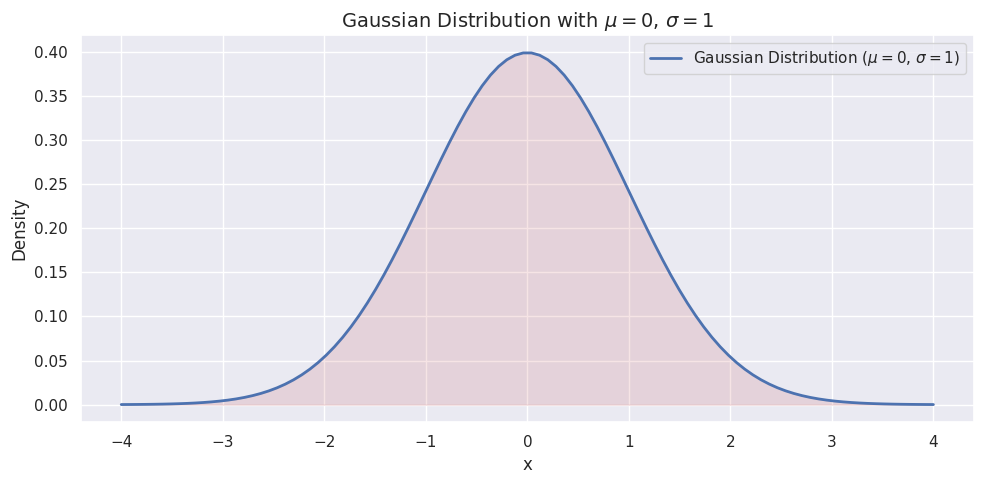

In [3]:
# TODO: plot tails or quantiles
# Plot the gaussian distribution
def plot_gaussian(mu, sigma, x_range, num_points):
    """
    Parameters:
    - mu: mean of the gaussian
    - sigma: standard deviation of the distribution
    - x_range: tuple specifying the range of x values to plot over
    - num_points: number of points to plot
    """
    xs = np.linspace(x_range[0], x_range[1], num_points)
    ys = gaussian_density_function(xs, mu, sigma)

    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 5))

    plt.plot(xs, ys, label=f'Gaussian Distribution ($\mu={np.round(mu, 3)}$, $\sigma={np.round(sigma, 3)}$)', color='b', lw=2)
    plt.fill_between(xs, ys, alpha=0.15, color='r')
    plt.title(f'Gaussian Distribution with $\mu={np.round(mu, 3)}$, $\sigma={np.round(sigma, 3)}$', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Plot univariate gaussian (test different values!)
MU_TEST = 0
SIGMA_TEST = 1
plot_gaussian(mu=MU_TEST, sigma=SIGMA_TEST, x_range=(MU_TEST-4*SIGMA_TEST, MU_TEST+4*SIGMA_TEST), num_points=100)

Sample data from this distribution (unknown a priori) and estimate it.

In [4]:
# Define our estimators
def mean_estimator(samples):
    n = len(samples)
    return np.sum(samples)/n

def variance_estimator(samples):
    n = len(samples)
    mean_estimation = mean_estimator(samples)
    variance_estimation = np.sum((samples - mean_estimation)**2)
    return np.sqrt(variance_estimation/n)

- Case small variance:

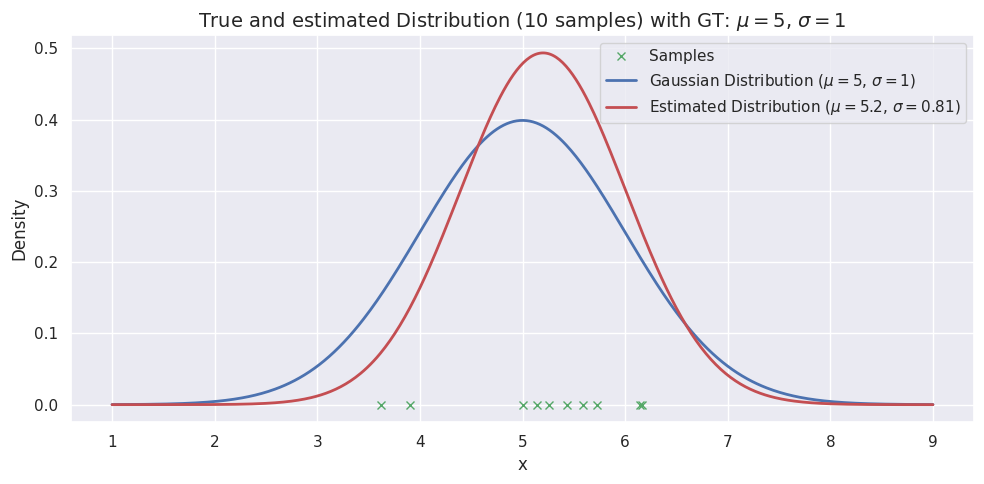

In [5]:
# Experiment with those values
true_mean = 5
true_std = 1
num_samples = 10
plot_num_points = 500
###########################################

generate_samples = np.random.normal(true_mean, true_std, num_samples)

mean_estimation = mean_estimator(generate_samples)
variance_estimation = variance_estimator(generate_samples)

xs = np.linspace(true_mean - 4*true_std, true_mean + 4*true_std, plot_num_points)
true_ys = gaussian_density_function(xs, true_mean, true_std)
estimated_ys = gaussian_density_function(xs, mean_estimation, variance_estimation)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

plt.plot(generate_samples, np.zeros(len(generate_samples)), "x", label="Samples", color='g')
plt.plot(xs, true_ys, label=f'Gaussian Distribution ($\mu={np.round(true_mean, 2)}$, $\sigma={np.round(true_std, 2)}$)', color='b', lw=2)
plt.plot(xs, estimated_ys, label=f'Estimated Distribution ($\mu={np.round(mean_estimation, 2)}$, $\sigma={np.round(variance_estimation, 2)}$)', color='r', lw=2)

plt.title(f'True and estimated Distribution ({num_samples} samples) with GT: $\mu={np.round(true_mean, 3)}$, $\sigma={np.round(true_std, 3)}$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

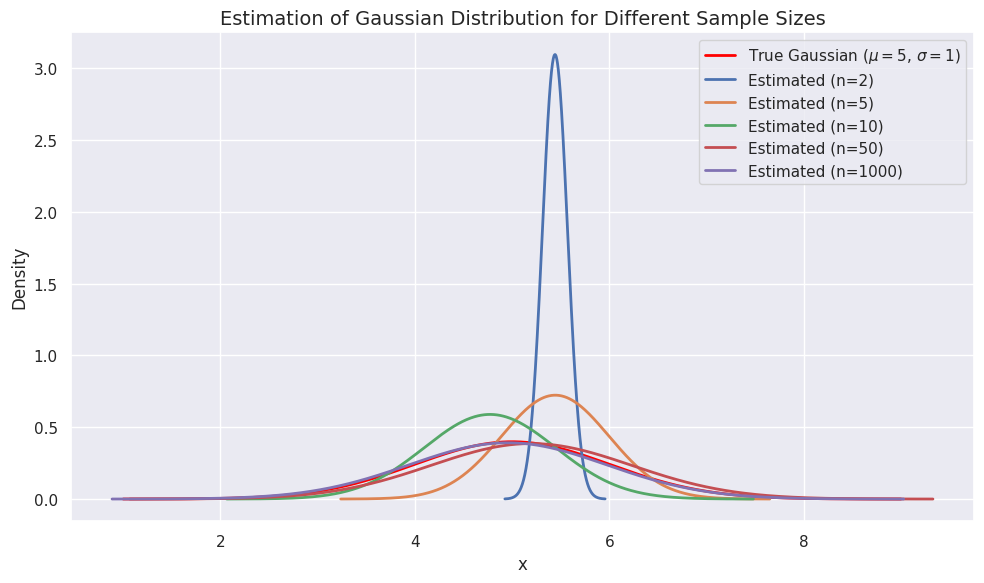

In [6]:
# Experiment with those values
true_mean = 5
true_std = 1
plot_num_points = 500
###########################################

# Example usage: Plot for multiple num_samples
num_samples_list = [2, 5, 10, 50, 1000]
samples_list = [np.random.normal(true_mean, true_std, n) for n in num_samples_list]

# Plot all the curves on the same figure
plt.figure(figsize=(10, 6))
xs = np.linspace(true_mean - 4*true_std, true_mean + 4*true_std, plot_num_points)
true_ys = gaussian_density_function(xs, true_mean, true_std)

# Plot the ground truth Gaussian distribution
plt.plot(xs, true_ys, label="True Gaussian ($\mu=5$, $\sigma=1$)", color='red', lw=2)

# Plot the estimated distributions for different sample sizes
for i, samples in enumerate(samples_list):
    mean_estimation = mean_estimator(samples)
    variance_estimation = variance_estimator(samples)
    xs = np.linspace(mean_estimation - 4*variance_estimation, mean_estimation + 4*variance_estimation, plot_num_points)
    estimated_ys = gaussian_density_function(xs, mean_estimation, variance_estimation)
    plt.plot(xs, estimated_ys, label=f'Estimated (n={len(samples)})', lw=2)

# Add labels and legend
plt.title('Estimation of Gaussian Distribution for Different Sample Sizes', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

- Case large variance:

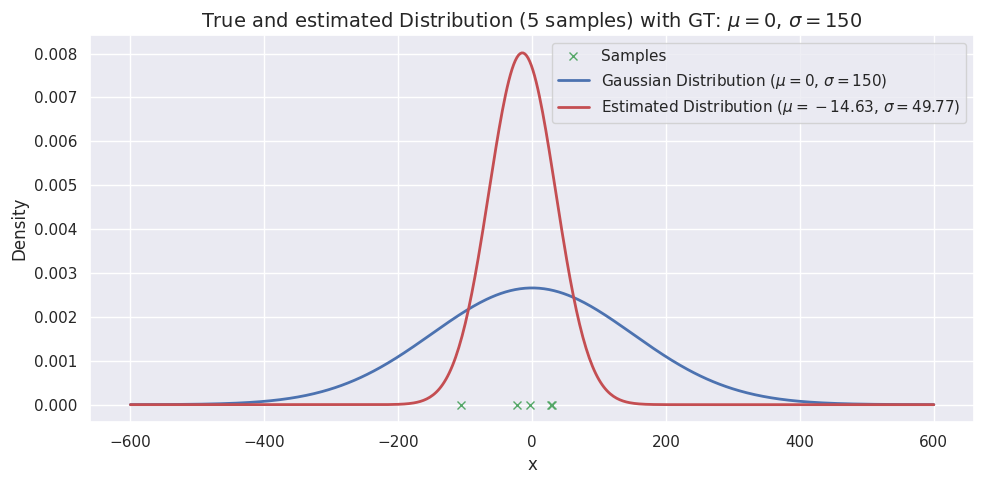

In [7]:
# Experiment with those values
true_mean = 0
true_std = 150
num_samples = 5
plot_num_points = 500
###########################################

generate_samples = np.random.normal(true_mean, true_std, num_samples)

mean_estimation = mean_estimator(generate_samples)
variance_estimation = variance_estimator(generate_samples)

xs = np.linspace(true_mean - 4*true_std, true_mean + 4*true_std, plot_num_points)
true_ys = gaussian_density_function(xs, true_mean, true_std)
estimated_ys = gaussian_density_function(xs, mean_estimation, variance_estimation)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

plt.plot(generate_samples, np.zeros(len(generate_samples)), "x", label="Samples", color='g')
plt.plot(xs, true_ys, label=f'Gaussian Distribution ($\mu={np.round(true_mean, 2)}$, $\sigma={np.round(true_std, 2)}$)', color='b', lw=2)
plt.plot(xs, estimated_ys, label=f'Estimated Distribution ($\mu={np.round(mean_estimation, 2)}$, $\sigma={np.round(variance_estimation, 2)}$)', color='r', lw=2)

plt.title(f'True and estimated Distribution ({num_samples} samples) with GT: $\mu={np.round(true_mean, 3)}$, $\sigma={np.round(true_std, 3)}$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### Multivariate case

A random vector **X** in $\mathbb{R}^n$ is said to follow a multivariate normal distribution if it has a probability density function of the form:

$$
f(\mathbf{x}) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})\right)
$$

where:
- $\mathbf{x} \in \mathbb{R}^k$ is the vector of variables,
- $\boldsymbol{\mu} \in \mathbb{R}^k$ is the mean vector,
- $\Sigma \in \mathbb{R}^{k \times k}$ is the covariance matrix,
- $|\Sigma|$ is the determinant of the covariance matrix,
- $\Sigma^{-1}$ is the inverse of the covariance matrix,
- $k$ is the number of dimensions (the size of the vector **X**).

Also:
- The covariance matrix $\Sigma$ must be symmetric and positive semi-definite.
- If $\Sigma$ is diagonal, the variables are independent, and each variable follows a univariate normal distribution.


In [8]:
# from scipy.stats import multivariate_normal

def multivariate_normal_distribution(mu, sigma, x):
    """
    Parameters:
    mu (numpy array): Mean vector of the distribution (k-dimensional).
    sigma (numpy array): Covariance matrix of the distribution (k x k matrix).
    x (numpy array): Point at which the density is to be evaluated (k-dimensional).
    """
    k = len(mu)
    sigma_det = np.linalg.det(sigma)
    if sigma_det == 0:
        raise ValueError("Covariance matrix must be non-singular.")
    sigma_inv = np.linalg.inv(sigma)

    exponent = -0.5*(x-mu).T@sigma_inv@(x-mu)
    normalization = 1/np.sqrt((2*np.pi)**k * sigma_det)
    return normalization*np.exp(exponent)

In [9]:
l = np.array([[1, 2], [1, 1]]) - np.array([1, 1])
l

array([[0, 1],
       [0, 0]])

#### Case k = 2

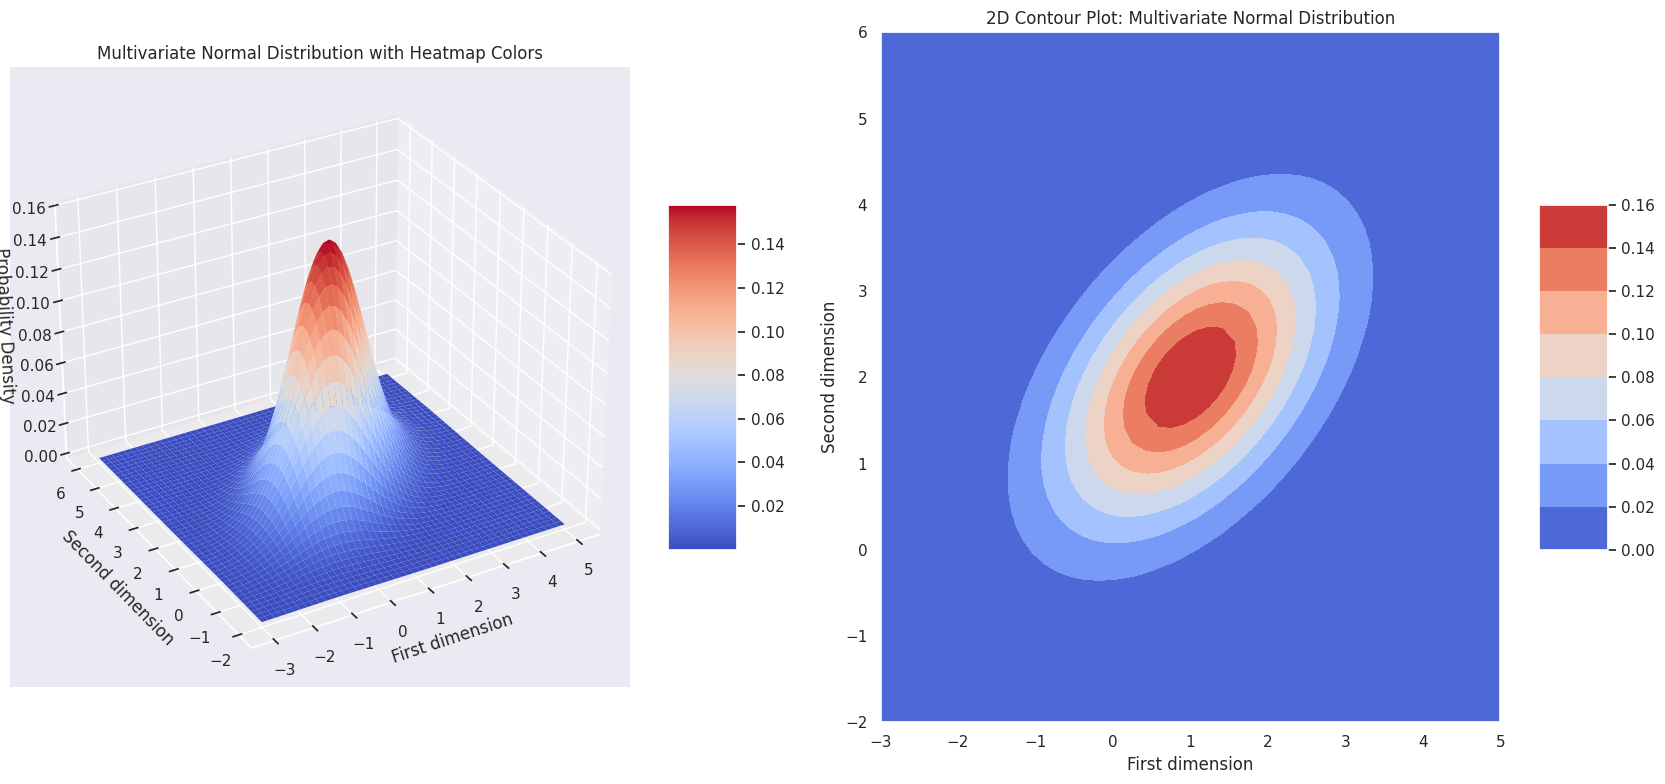

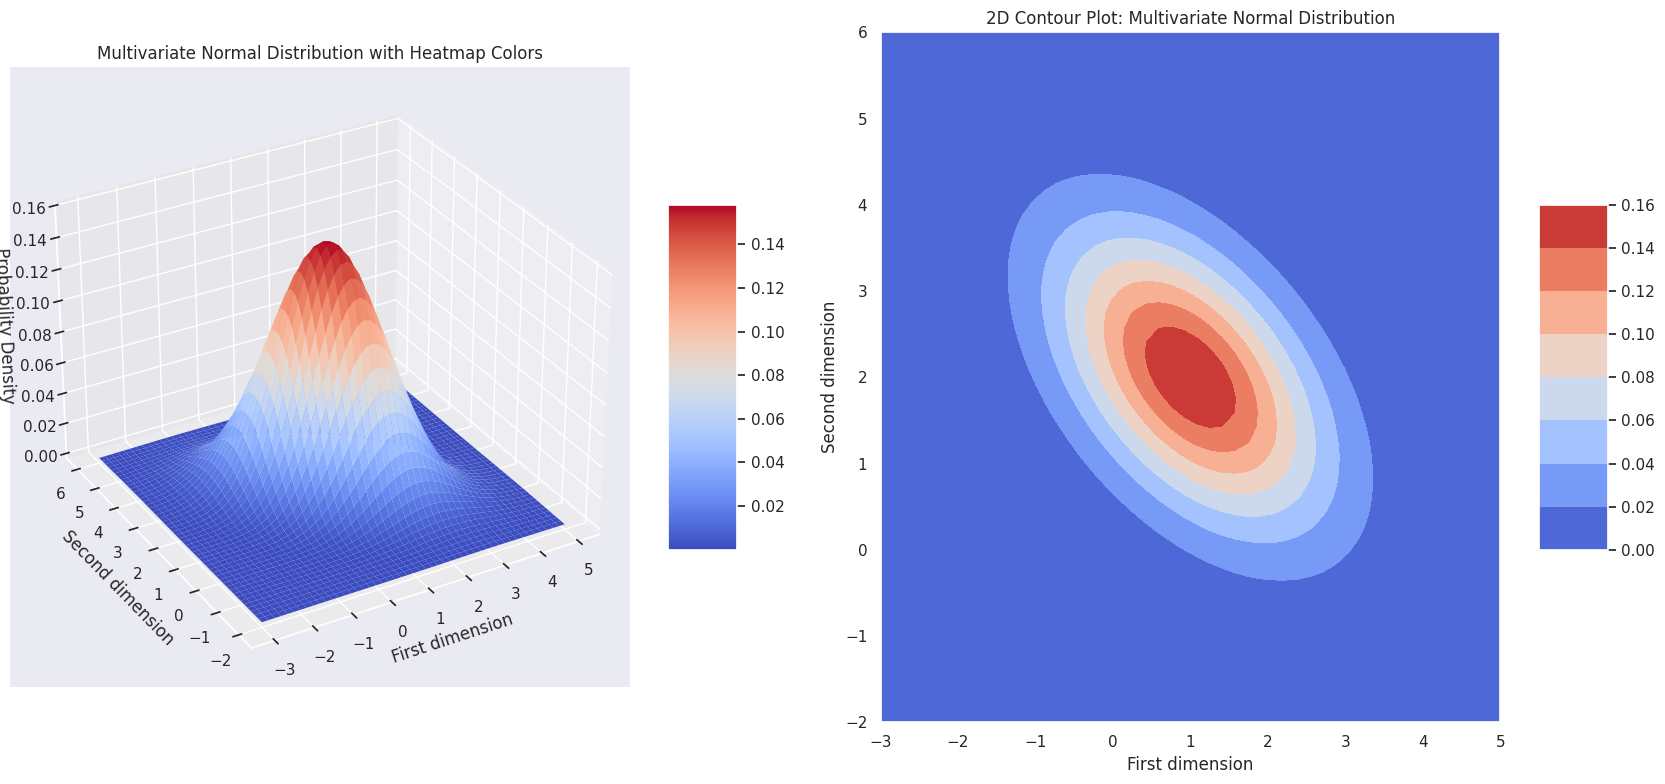

In [10]:
def plot_2D_normal_distribution(mu, sigma, num_points=50):
    """
    """
    x = np.linspace(mu[0]-4*sigma[0][0], mu[0]+4*sigma[0][0], num_points)
    y = np.linspace(mu[1]-4*sigma[1][1], mu[1]+4*sigma[1][1], num_points)
    xv, yv = np.meshgrid(x, y)
    coordinates = np.column_stack([x.ravel(), y.ravel()])
    z = np.zeros_like(xv)

    for i in range(num_points):
        for j in range(num_points):
            point = np.array([xv[i, j], yv[i, j]])  # Create a 2D point [x, y]
            z[i, j] = multivariate_normal_distribution(mu, sigma, point)

    # Set up the 3D plot
    fig = plt.figure(figsize=(17, 8))
    ax = fig.add_subplot(121, projection='3d')
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    surf = ax.plot_surface(xv, yv, z, cmap=cmap, edgecolor='none', rstride=1, cstride=1)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    ax.set_xlabel('First dimension')
    ax.set_ylabel('Second dimension')
    ax.set_zlabel('Probability Density')    
    ax.view_init(elev=30, azim=240)
    plt.title('Multivariate Normal Distribution with Heatmap Colors')

    # 2D contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(xv, yv, z, cmap=cmap)
    fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
    ax2.set_xlabel('First dimension')
    ax2.set_ylabel('Second dimension')
    ax2.set_title('2D Contour Plot: Multivariate Normal Distribution')

    plt.tight_layout()
    plt.show()


##########################"
MU_2D_TEST = np.array([1, 2])
SIGMA_2D_TEST = np.array([[1, 0],
                          [1, 1]])

plot_2D_normal_distribution(MU_2D_TEST, SIGMA_2D_TEST)


MU_2D_TEST = np.array([1, 2])
SIGMA_2D_TEST = np.array([[1, -1],
                          [0, 1]])

plot_2D_normal_distribution(MU_2D_TEST, SIGMA_2D_TEST)

In [11]:
# Define our estimators
def multivariate_mean_estimator(samples):
    n = len(samples)
    return np.sum(samples, axis=0)/n

def multivariate_covariance_estimator(samples):
    n = len(samples)
    mean_estimation = multivariate_mean_estimator(samples)
    centered_samples = samples - mean_estimation
    covariance_estimate = centered_samples.T@centered_samples/n
    return covariance_estimate

def multivariate_normal_distribution(mean, cov, point):
    return scipy.stats.multivariate_normal.pdf(point, mean=mean, cov=cov)

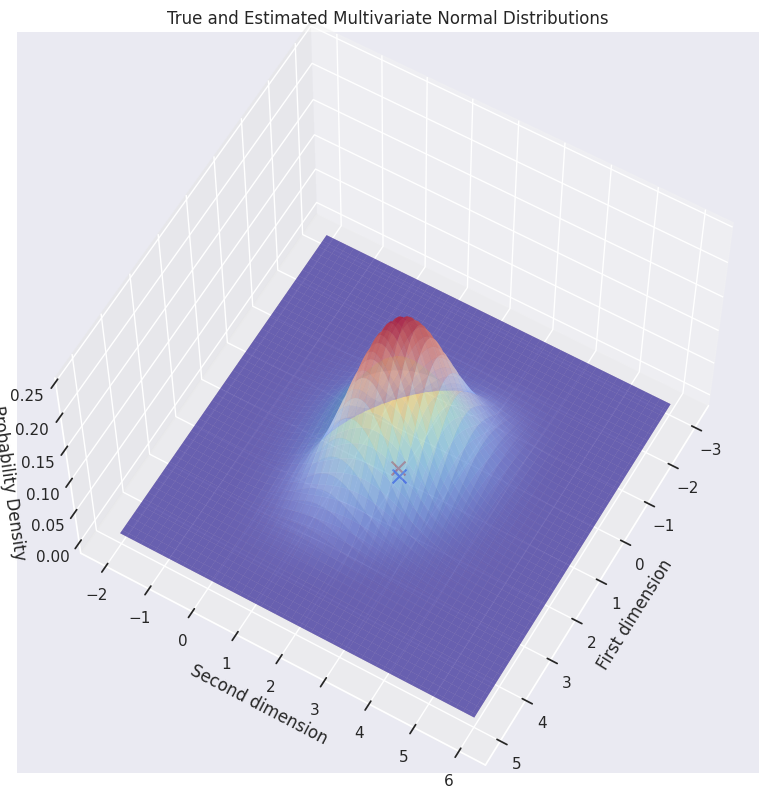

In [12]:
# Experiment with those values
true_mean = np.array([1, 2])
true_cov = np.array([[1, 0], [0, 1]])
num_samples = 10
plot_num_points = 100
###########################################
# Generate samples from the unknown distribution
generate_samples = np.random.multivariate_normal(true_mean, true_cov, num_samples)

mean_estimation = multivariate_mean_estimator(generate_samples)
covariance_estimation = multivariate_covariance_estimator(generate_samples)

x = np.linspace(true_mean[0]-4*true_cov[0][0], true_mean[0]+4*true_cov[0][0], plot_num_points)
y = np.linspace(true_mean[1]-4*true_cov[1][1], true_mean[1]+4*true_cov[1][1], plot_num_points)
X, Y = np.meshgrid(x, y)

Z_true = multivariate_normal_distribution(true_mean, true_cov, np.dstack((X, Y)))
Z_estimated = multivariate_normal_distribution(mean_estimation, covariance_estimation, np.dstack((X, Y)))

# Create the 3D plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

surf_true = ax.plot_surface(X, Y, Z_true, cmap='viridis', alpha=0.5, edgecolor='none', label='True Distribution')
surf_estimated = ax.plot_surface(X, Y, Z_estimated, cmap='coolwarm', alpha=0.5, edgecolor='none', label='Estimated Distribution')

ax.scatter(*true_mean, color='red', s=100, marker='x', label='True Mean')
ax.scatter(*mean_estimation, color='blue', s=100, marker='x', label='Estimated Mean')

ax.set_xlabel('First dimension')
ax.set_ylabel('Second dimension')
ax.set_zlabel('Probability Density')
ax.view_init(elev=60, azim=30)
plt.title('True and Estimated Multivariate Normal Distributions')
plt.tight_layout()
plt.show()

# Importance sampling

Now, we explore **importance sampling**, a technique used to estimate expectations with respect to a distribution that is difficult to sample from directly.

Let $𝑋$ be the target distribution with density $f(x)$, and $Y$ represent a proposal distribution with density $g(x)$, from which we can easily sample. Our goal is to estimate the expectation of a function under $X$ by sampling from $Y$ and correcting the bias through importance weights.

This technique is widely used in off-policy RL, where we estimate the expected return of a policy (target distribution) while using data collected from a different policy (proposal distribution).

**Off-policy RL, particle filtering.**

#### Intuition (with code)

In [37]:
# This is the proposal distribution
PROPOSAL_MU = 5
PROPOSAL_SIGMA = 2
def proposal_distribution(x):
    return gaussian_density_function(x, PROPOSAL_MU, PROPOSAL_SIGMA)

# The target parameters
TARGET_MU = 1
TARGET_SIGMA = 1
def target_distribution(x):
    return gaussian_density_function(x, TARGET_MU, TARGET_SIGMA)

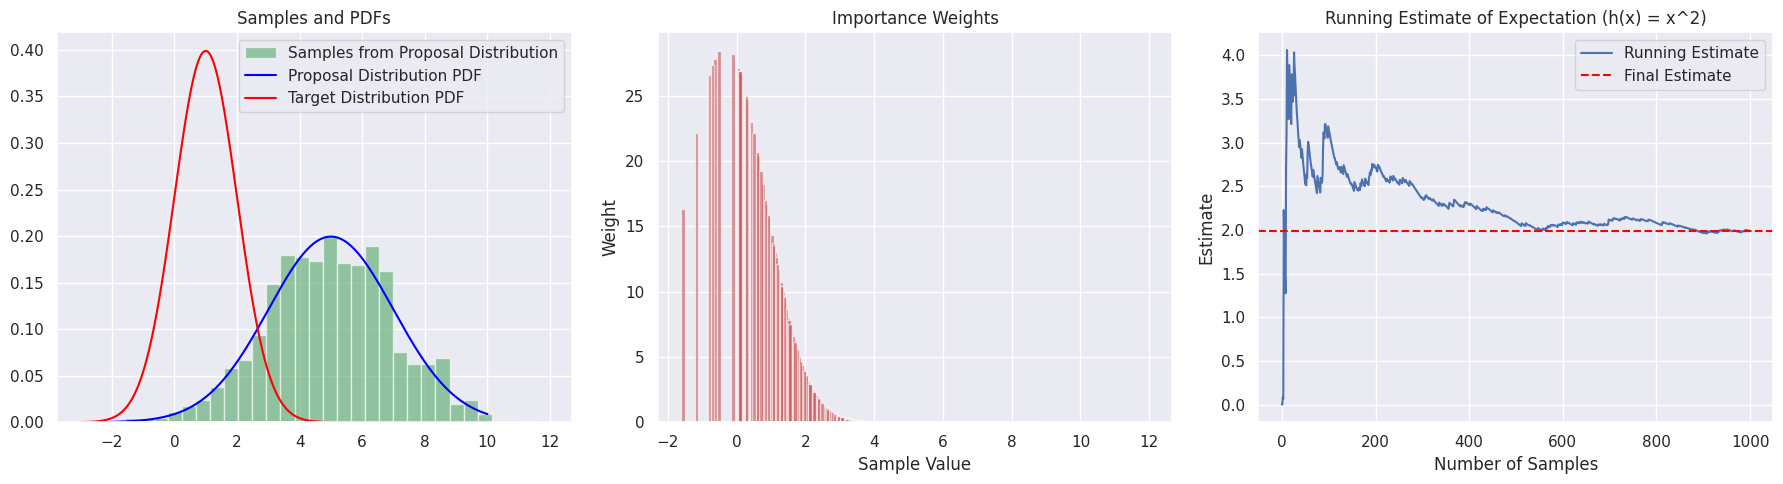

* Estimated expectation of h(x) = x^2 under the target distribution: 1.9907567795914742
* Variance: 0.020487875793328607
* Confidence interval: (1.7102104845746782, 2.2713030746082703)


In [47]:
# Function we want to estimate
def h(x):
    return x**2

# Importance sampling implementation
def importance_sampling(n_samples=1000):
    samples = np.random.normal(PROPOSAL_MU, PROPOSAL_SIGMA, n_samples)    
    weights = target_distribution(samples)/proposal_distribution(samples)
    weighted_h = h(samples)*weights
    estimate = np.mean(weighted_h)
    variance = np.var(weighted_h)/n_samples
    confidence_interval = (estimate-1.96*np.sqrt(variance), estimate+1.96*np.sqrt(variance))
    return samples, weights, estimate, variance, confidence_interval

def running_estimate(samples, weights):
    estimates = []
    cumulative_sum = 0
    for i in range(1, len(samples) + 1):
        cumulative_sum += h(samples[i - 1])*weights[i - 1]
        estimates.append(cumulative_sum/i)
    return estimates

##########################################################################
##########################################################################
##########################################################################
n_samples = 1000
samples, weights, estimate, variance, confidence_interval = importance_sampling(n_samples)

running_estimates = running_estimate(samples, weights)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Samples from Proposal Distribution')
x_vals = np.linspace(-3, 10, 1000)
ax[0].plot(x_vals, proposal_distribution(x_vals), label='Proposal Distribution PDF', color='blue')
ax[0].plot(x_vals, target_distribution(x_vals), label='Target Distribution PDF', color='red')
ax[0].set_title("Samples and PDFs")
ax[0].legend()

ax[1].bar(samples, weights, width=0.1, color='r', alpha=0.6)
ax[1].set_title("Importance Weights")
ax[1].set_xlabel("Sample Value")
ax[1].set_ylabel("Weight")

ax[2].plot(running_estimates, label='Running Estimate')
ax[2].axhline(estimate, color='red', linestyle='--', label='Final Estimate')
ax[2].set_title("Running Estimate of Expectation (h(x) = x^2)")
ax[2].set_xlabel("Number of Samples")
ax[2].set_ylabel("Estimate")
ax[2].legend()

plt.tight_layout()
plt.show()

print(f"* Estimated expectation of h(x) = x^2 under the target distribution: {estimate}")
print(f"* Variance: {variance}")
print(f"* Confidence interval: {confidence_interval}")

* **TODO:** Convergence of the estimate to the true value for different mean values of the proposal distribution.

"If g has thinner tails than f , then this integral might be inﬁnite. To avoid this, a basic rule in importance sampling is to sample from a density g with thicker tails than f"

# Monte Carlo integration

We aim to evaluate the integral of a function $f$ over the interval $[a, b]$, where finding the primitive of $f$ is difficult or unknown:

$$
I = \int_a^b f(x) \, dx
$$

Monte Carlo integration provides a numerical method to estimate this integral. By rewriting the integral in a form suitable for sampling:

$$
I = \int_a^b f(x) \, dx = \int_a^b (b - a) f(x) \frac{1}{b - a} \, dx = \int_a^b \omega(x) g(x) \, dx = \, \mathbb{E}_g[\omega(X)]
$$

Where:

- $\omega(x) = (b - a)f(x)$
- $g(x) = \frac{1}{b - a}$ is the probability density function of a uniform distribution
- $X \sim \mathrm{Unif}([a, b])$

Thus, the problem reduces to computing an estimate of the expected value $\mathbb{E}_g[\omega(X)]$, which can be approximated by sampling from the uniform distribution $X \sim \mathrm{Unif}([a, b])$ and averaging the corresponding function values as we did above.


In [50]:
# TODO: plot with different num samples
def f(x):
    return np.sin(x)

a = 0
b = np.pi

n_samples = 10000
X = np.random.uniform(a, b, n_samples)
omega_X = (b-a)*f(X)
integral_estimate = np.mean(omega_X)

print("Estimated integral:", integral_estimate)

Estimated integral: 2.004288085355976


# Hypothesis testing

T-statistic: 1.8090680674665838
P-value: 0.10388813106210133
Fail to reject the null hypothesis: No significant difference from the population mean.


# Evidence Lower BOund (ELBO)

Derivation

Purpose Variational inference

Curve that show the lower bound

In [ ]:
import flax
import jax.numpy as jnp